# Data Processing Notebook

This notebook is for initial cleaning and splitting for the given raw dataset, this step is important for the following reasons:

- Reduce the noise and unnecessary segments such as phone numbers and emails to keep the focus on the meaning while training.
- Normalize the spaces and used character set.
- Split training set into `train` and `valid` canonical splits to keep consistency across the experiments.

In [1]:
import pandas as pd
import re

In [2]:
train = pd.read_csv("../data/raw/train.csv", index_col=0)
train

,content,cyber_label,environmental_issue
0,All rights reserved. MA23-16258 988982046\n\nh...,NaN,0
1,Revisiting our purpose and/or values statement...,NaN,0
2,Amid ongoing strategic competition in a\nmulti...,NaN,0
3,"Source: PwC Pulse Survey, November 2, 2022: ba...",NaN,0
4,Executive Summary 2 \nAgeing and\nHealth Conce...,NaN,1
...,...,...,...
1295,"Source: PwC Pulse Survey, November 2, 2022: ba...",NaN,0
1296,Military-driven innovations in relevant fields...,NaN,0
1297,", artificial\nintelligence, automation in all ...",NaN,0
1298,Year-over-year cyberattacks continue to evolve...,1.0,0


Let's fix the NaN in the `cyber_label` column and ensure that both label columns as casted to INT

In [3]:
train.cyber_label.fillna(0)
train.environmental_issue.fillna(0)
train.cyber_label = train.cyber_label.fillna(0).astype(int)
train.environmental_issue = train.environmental_issue.astype(int)

In [4]:
train

,content,cyber_label,environmental_issue
0,All rights reserved. MA23-16258 988982046\n\nh...,0,0
1,Revisiting our purpose and/or values statement...,0,0
2,Amid ongoing strategic competition in a\nmulti...,0,0
3,"Source: PwC Pulse Survey, November 2, 2022: ba...",0,0
4,Executive Summary 2 \nAgeing and\nHealth Conce...,0,1
...,...,...,...
1295,"Source: PwC Pulse Survey, November 2, 2022: ba...",0,0
1296,Military-driven innovations in relevant fields...,0,0
1297,", artificial\nintelligence, automation in all ...",0,0
1298,Year-over-year cyberattacks continue to evolve...,1,0


In [5]:
from cleantext import clean

def clean_text(text: str):
    text = text.strip()  # cut the left and right spaces
    text = text.strip(',')
    text = text.strip()
    text = re.sub(r'\t+','\t',text)
    text = re.sub(r'\n+','\n',text)
    text = re.sub(r' +',' ',text)
    text = re.sub(r'([\d\+])\s+(\d)', r'\1\2', text)  # normalize the numbers; spaces in between will be removed.

    text = clean(
        text=text,
        fix_unicode=True,
        to_ascii=True,
        lower=False,
        no_line_breaks=False,
        no_urls=True,
        no_emails=True,
        no_phone_numbers=True,
        no_numbers=False,
        no_digits=False,
        no_currency_symbols=False,
        no_punct=False,
        replace_with_punct="",
        replace_with_url="URL",
        replace_with_email="EMAIL",
        replace_with_phone_number="PHONE NUMBER",
        replace_with_number="123",
        replace_with_digit="0",
        replace_with_currency_symbol="$",
        lang="en"
	)

    return text

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [6]:
train.content.sample(10)

784     Source: PwC Pulse Survey, November 2, 2022: ba...
982     For those who have started environmental\naudi...
913     Source: PwC Pulse Survey, November 2, 2022: ba...
837     Despite some improvement during the pandemic,\...
282     Increased\nseverity and frequency of extreme w...
1000    Then, just as the United States and Europe wer...
96      That list is based on each risk’s overall aver...
617     In parallel, the frequency and severity\nof he...
676     Resource constraints –\nthe danger of divergen...
609     Other top 10 risks\n\nOutside the top five ris...
Name: content, dtype: object

In [7]:
train.content.apply(clean_text).sample(20)

185     A similar pattern is visible on macroeconomic ...
186     IT Talent Shortage\nKey Risk Indicators\nAs so...
680     Moreover, leaders view\ncloud and XaaS as crit...
876     MACROECONOMIC AND GEOPOLITICAL\nRISK, EMERGING...
1292    At least seven in 10\nusers reported their sma...
1177    For decades, rich nations\ntreated water scarc...
566     artificial\nintelligence, automation in all of...
690     Full time 43%\nFour days per week 4%\nThree da...
804     artificial\nintelligence, automation in all of...
1133    Given the prominent role\nthat many audit comm...
634     Unsure/NANo involvement Influence strategy\nEx...
1226    "Breakdown of\ncritical information infrastruc...
1288    Quality of climate change\nfinancial disclosur...
554     Source: PwC Pulse Survey, November 2, 2022: ba...
963     Military Economic\nCyberwar\nerupts\nDeteriora...
145     We have successfully balanced price\nincreases...
1031    Deployment of 5G networks\n5G technology trans...
380     Source

In [8]:
train["clean_content"] = train.content.apply(clean_text)

In [9]:
train.sample(2)['clean_content'].to_list()

['Respondents in North\nAmerica indicate the highest\nlevel of overall risk concerns\nfor 2023 and, along with\nrespondents from India,\nthe highest increase in\nperceptions of risk from\n2022 to 2023. 156\nURL\nConsistent with our full sample results, the risk associated\nwith succession and talent acquisition and retention is top\nof mind for many regions. Six of the eight included this risk\nin their top five. Across the eight regions, the variation\nin top five results is striking. Only four risks are common\nto at least four of the eight regions. The macroeconomic\nrisk related to economic conditions and two additional\noperational risks are ranked in the top five by at least four\nof the eight regions. These two risks relate to (1) supply\nchain challenges, and (2) organizational culture making it\ndifficult to escalate risk concerns. Only one strategic risk\nis included among the top five for any of the regions in\n2023: organizational resilience and/or agility.\n2032 risk issue

<Axes: >

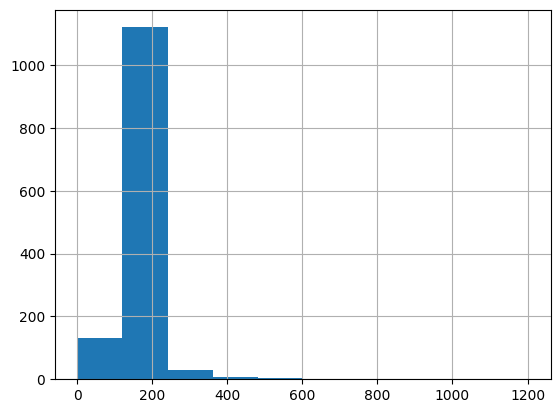

In [10]:
train['content'].str.split().map(lambda x: len(x)).hist()

<Axes: >

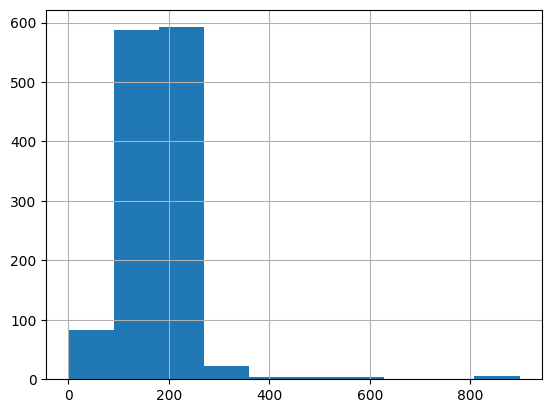

In [11]:
train['clean_content'].str.split().map(lambda x: len(x)).hist()

A bit shift in the same sentence word count distribtion, automatically eliminated some outliers!

Now let's investigate lengths:

In [12]:
word_len = train['clean_content'].str.split().map(lambda x: len(x))

In [13]:
word_len.describe()

count    1300.000000
mean      174.203846
std        70.680379
min         1.000000
25%       162.000000
50%       180.000000
75%       191.000000
max       898.000000
Name: clean_content, dtype: float64

**Note:**

When splitted words by space (simplest assumption), data is fairly distributed around ~180 words per sentence!

Let's cut the outliers:

In [14]:
print("Texts with sentences below 25 words: ", len(train[word_len <= 25]['clean_content'].tolist()), ", let's check them")

Texts with sentences below 25 words:  22 , let's check them


In [15]:
train[word_len <= 25]['clean_content'].tolist()

['All rights reserved. MA23-16258988982046\nURL',
 '3',
 'joke',
 'n\nn\nn',
 'n\nn\nn',
 '1',
 'a',
 '0',
 '2',
 'got',
 'b',
 'c',
 'Head of Strategy and\nCompetitiveness Department\nKennedy Kalisa, Strategy Analyst\nRichard Kayibanda, Ag.',
 'is',
 'kinda',
 'd',
 'me',
 'this',
 'you',
 'As about a third\nof global production currently goes to waste, investment\nin food storage, logistics, and distribution will also be\ncritical.',
 '0',
 'Automated AI-based tools such as\nchatbots collect a wide amount of personal data to\nfunction effectively.']

Let's check longer texts:

In [16]:
print(len(train[word_len >= 350]['clean_content'].tolist()))

18


In [17]:
train[word_len >= 350]

,content,cyber_label,environmental_issue,clean_content
116,", artificial intelligence, automation in all o...",1,0,"artificial intelligence, automation in all of ..."
120,", artificial intelligence, automation in all o...",1,0,"artificial intelligence, automation in all of ..."
226,", artificial intelligence,\nautomation in all ...",1,1,"artificial intelligence,\nautomation in all of..."
469,", artificial\nintelligence, automation in all ...",0,0,"artificial\nintelligence, automation in all of..."
566,", artificial\nintelligence, automation in all ...",0,0,"artificial\nintelligence, automation in all of..."
636,Continuing Professional Education Credits (CPE...,0,0,Continuing Professional Education Credits (CPE...
640,", artificial intelligence,\nautomation in all ...",1,1,"artificial intelligence,\nautomation in all of..."
643,", artificial intelligence, automation in all\n...",1,1,"artificial intelligence, automation in all\nof..."
720,", artificial intelligence,\nautomation in all ...",1,1,"artificial intelligence,\nautomation in all of..."
772,", artificial\nintelligence, automation in all ...",1,1,"artificial\nintelligence, automation in all of..."


In [18]:
len(train[word_len >= 350]['clean_content'].tolist())

18

When we cut length-wise outliers, distribution won't get harm, so let's cut them!

In [19]:
cleaned_train = train[(word_len > 25) & (word_len < 350)][["clean_content", 'cyber_label', 'environmental_issue']]

In [20]:
cleaned_train

,clean_content,cyber_label,environmental_issue
1,Revisiting our purpose and/or values statement...,0,0
2,Amid ongoing strategic competition in a\nmulti...,0,0
3,"Source: PwC Pulse Survey, November 2, 2022: ba...",0,0
4,Executive Summary 2\nAgeing and\nHealth Concer...,0,1
5,"Further, even comparatively orderly fiscal\nco...",0,0
...,...,...,...
1295,"Source: PwC Pulse Survey, November 2, 2022: ba...",0,0
1296,Military-driven innovations in relevant fields...,0,0
1297,"artificial\nintelligence, automation in all of...",0,0
1298,Year-over-year cyberattacks continue to evolve...,1,0


It would make sense to apply the same cleaning on the unlabelled test set as well:

In [21]:
test = pd.read_csv("../data/raw/test.csv", index_col=0)
test

,content
0,More recently there has been a focus on risks ...
1,Energy crisis ↑\n3. Business interruption ↓\n\...
2,The survey results indicate that a lack of ski...
3,Respondents could\nselect more than one risk.0...
4,The interest payable on\nthe country's public ...
...,...
137,Negative No impact Positive Unsure\n\nNo chang...
138,"In Ethiopia, Kenya, and Somalia, for example, ..."
139,", artificial intelligence, automation in all o..."
140,Personal Data Regulatory\n\nFragmentation\n\nT...


In [22]:
test["clean_content"] = test.content.apply(clean_text)
test.sample(2).clean_content.tolist()

['These groups also view 2032 as riskier than 2023, rating\nsignificantly more 2032 risks at the "Significant Impact"\nlevel compared with 2023. CROs and CAEs, consistent\nwith their views for 2023, also have the most varied risk\noutlooks, with the most risks rated at the "Least Significant\nImpact" level than other groups. Again, CHROs have the\nhighest risk concern and rate all risks at the "Significant\nImpact" level. Five executive position groups rate either\nno or one risk at the "Significant Impact" level. (Four of the\n10 position groups did so for 2023.)The biggest change in\nlong-term outlook is with CEOs, who rate only one risk as\n"Significant Impact" for 2032 after rating 10 risks at that\nlevel in our previous survey looking out to 2031.\nThe disparity of perspectives among\nexecutives and directors begs for more\nengagement in conversations with one\nanother to forge a robust view of the\norganization\'s risk profile.\nTable 11 shows the average risk scores for both 202

In [23]:
cleaned_train

,clean_content,cyber_label,environmental_issue
1,Revisiting our purpose and/or values statement...,0,0
2,Amid ongoing strategic competition in a\nmulti...,0,0
3,"Source: PwC Pulse Survey, November 2, 2022: ba...",0,0
4,Executive Summary 2\nAgeing and\nHealth Concer...,0,1
5,"Further, even comparatively orderly fiscal\nco...",0,0
...,...,...,...
1295,"Source: PwC Pulse Survey, November 2, 2022: ba...",0,0
1296,Military-driven innovations in relevant fields...,0,0
1297,"artificial\nintelligence, automation in all of...",0,0
1298,Year-over-year cyberattacks continue to evolve...,1,0


So far so good!

Let's have our canonical training and validation splits and save them for later:

20% validation is an arbitrary guess for the split, less than that will produce a very small validation set that will not reflect the entire distribution.

In [24]:
train_split = cleaned_train.sample(frac=0.8,random_state=42)
valid_split = cleaned_train.drop(train_split.index)

In [25]:
train_split.reset_index(drop=True, inplace=True)
train_split

,clean_content,cyber_label,environmental_issue
0,It is a process that puts a heavier burden\nof...,0,0
1,Unsure/NANot at all confident\nSomewhat confid...,0,0
2,IIA Netherlands paper Climate change\nand envi...,0,0
3,They are also prone to fraud; between January ...,1,0
4,Nothing in the arrangements or rules of the BD...,0,0
...,...,...,...
1003,"0102030405060708090100\nHealth, safety and sec...",0,0
1004,Risk 10\n10203040506070800\n1020304050607080\n...,0,0
1005,"Moreover, leaders view\ncloud and XaaS as crit...",0,0
1006,Additional pressure\non staff from waves of co...,0,0


In [26]:
valid_split.reset_index(drop=True, inplace=True)
valid_split

,clean_content,cyber_label,environmental_issue
0,Amid ongoing strategic competition in a\nmulti...,0,0
1,Full time 17%\nFour days per week 6%\nThree da...,0,0
2,In comparing\nthis year's survey results to la...,1,1
3,87\nURL\nFIGURE 10A\nBoard Members 2023\nChang...,0,1
4,"Near term for 2023, they are rated 12th and\n1...",0,1
...,...,...,...
247,"As\nsupply networks struggled, Deloitte urged ...",0,0
248,"Again, the\nscores in Figure 27 reflect respon...",0,0
249,With consumer and\nbusiness confidence weakeni...,0,0
250,Quality of climate change\nfinancial disclosur...,0,0


In [27]:
test[["clean_content"]].reset_index(drop=True).to_csv("../data/processed/clean_test.csv", index=False)

Save the splits under `processed` folder

In [28]:
train_split.to_csv("../data/processed/clean_train.csv", index=False)
valid_split.to_csv("../data/processed/clean_valid.csv", index=False)

In [29]:
pd.read_csv("../data/processed/clean_valid.csv")

,clean_content,cyber_label,environmental_issue
0,Amid ongoing strategic competition in a\nmulti...,0,0
1,Full time 17%\nFour days per week 6%\nThree da...,0,0
2,In comparing\nthis year's survey results to la...,1,1
3,87\nURL\nFIGURE 10A\nBoard Members 2023\nChang...,0,1
4,"Near term for 2023, they are rated 12th and\n1...",0,1
...,...,...,...
247,"As\nsupply networks struggled, Deloitte urged ...",0,0
248,"Again, the\nscores in Figure 27 reflect respon...",0,0
249,With consumer and\nbusiness confidence weakeni...,0,0
250,Quality of climate change\nfinancial disclosur...,0,0


In [30]:
pd.read_csv("../data/processed/clean_test.csv")
pd.read_csv("../data/processed/clean_train.csv")

,clean_content,cyber_label,environmental_issue
0,It is a process that puts a heavier burden\nof...,0,0
1,Unsure/NANot at all confident\nSomewhat confid...,0,0
2,IIA Netherlands paper Climate change\nand envi...,0,0
3,They are also prone to fraud; between January ...,1,0
4,Nothing in the arrangements or rules of the BD...,0,0
...,...,...,...
1003,"0102030405060708090100\nHealth, safety and sec...",0,0
1004,Risk 10\n10203040506070800\n1020304050607080\n...,0,0
1005,"Moreover, leaders view\ncloud and XaaS as crit...",0,0
1006,Additional pressure\non staff from waves of co...,0,0


## Class Imbalance
Let's check the class imbalance and address it in a different split.

Because the labels are not mutually exclusive, we will upscale the under-represented classes all to the same level, so let's iterate over the entire dataset and check untill we have our combination balanced:

In [31]:
import pandas as pd
from sklearn.utils import resample

def balance_classes(df, label_cols):
    # Determine unique combinations of label classes
    unique_combinations = df[label_cols].drop_duplicates()
    
    # List to store balanced subsets
    balanced_subsets = []
    
    # Balance each unique combination
    for _, combination in unique_combinations.iterrows():
        subset = df[(df[label_cols[0]] == combination[label_cols[0]]) &
                    (df[label_cols[1]] == combination[label_cols[1]])]
        
        # Calculate the number of samples for this combination needed to balance
        max_samples = df.groupby(label_cols).size().max()
        
        # Upsample the subset to the calculated number of samples
        if len(subset) < max_samples:
            subset = resample(subset, 
                              replace=True, 
                              n_samples=max_samples, 
                              random_state=123)
        
        # Collect the balanced subset
        balanced_subsets.append(subset)
    
    # Combine all balanced subsets
    balanced_df = pd.concat(balanced_subsets).sample(frac=1, random_state=123).reset_index(drop=True)
    return balanced_df

# Balance both cyber_label and environmental_issue within the same DataFrame
train_df_balanced = balance_classes(train_split, ['cyber_label', 'environmental_issue'])

print("Balanced DataFrame:")
train_df_balanced

Balanced DataFrame:


,clean_content,cyber_label,environmental_issue
0,"Additionally the risk of natural catastrophes,...",1,1
1,Increased\nseverity and frequency of extreme w...,0,1
2,As volatility in multiple domains\ngrows in pa...,0,1
3,"For example, advances in biotechnologies could...",1,0
4,We also thank our Academic partners: the Natio...,0,0
...,...,...,...
2899,"artificial\nintelligence, automation in all of...",1,0
2900,"Climate Change 2022: Impacts, Adaptation and V...",0,1
2901,Energy crisis\nThe impact of the energy\ncrisi...,0,1
2902,"artificial\nintelligence, automation in all of...",1,0


In [32]:
train_df_balanced[["cyber_label", "environmental_issue"]].value_counts()

cyber_label  environmental_issue
0            0                      726
             1                      726
1            0                      726
             1                      726
Name: count, dtype: int64

In [33]:
train_df_balanced.to_csv("../data/processed/clean_train_upsampled.csv", index=False)

In [34]:
pd.read_csv("../data/processed/clean_train_upsampled.csv")

,clean_content,cyber_label,environmental_issue
0,"Additionally the risk of natural catastrophes,...",1,1
1,Increased\nseverity and frequency of extreme w...,0,1
2,As volatility in multiple domains\ngrows in pa...,0,1
3,"For example, advances in biotechnologies could...",1,0
4,We also thank our Academic partners: the Natio...,0,0
...,...,...,...
2899,"artificial\nintelligence, automation in all of...",1,0
2900,"Climate Change 2022: Impacts, Adaptation and V...",0,1
2901,Energy crisis\nThe impact of the energy\ncrisi...,0,1
2902,"artificial\nintelligence, automation in all of...",1,0


#### Now, we're ready to use these splits in our training experiments